## 問題提議

四角が存在して、縦長か横長かを判定する。  
正直それだけなら座標見れば一発だが、敢えてベクトル的に考えてみる。

| 横幅 | 縦幅 | 形 |
|------|------|----|
| 80 | 150 | 縦長 |
| 60 | 110 | 縦長 |
| 35 | 130 | 縦長 |
| 160 | 50 | 横長 |
| 160 | 20 | 横長 |
| 125 | 30 | 横長 |

これをプロットすると

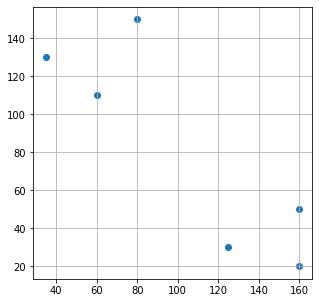

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([80, 60, 35, 160, 160, 125])
y = np.array([150, 110, 130, 50, 20, 30])

fig = plt.figure(figsize=(5.0, 5.0)) # グラフサイズ

plt.scatter(x, y, marker = 'o')

plt.grid()
plt.show()

これを線引きする直線を求めたい。  
これを行列的に求めるなら、`重みベクトルを法線ベクトルとした直線` という言葉になる…らしい。

うーん難しい `（；^ω^）`

重みベクトルを $w$ とすると直線の方程式は

$w \cdot x=0$ もっというと $w_1 \cdot x_1 + w_2 \cdot x_2 = 0$

ってなるので、$w = (1, 1)$ と仮定すると　$x_1+ x_2 = 0$ ということは

$$x_1 = -x_2$$

これを図にすると

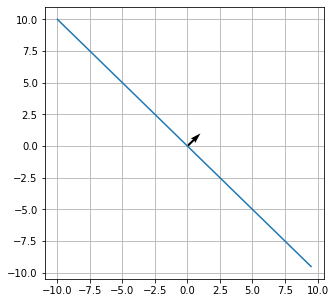

In [2]:
fx = lambda x : -x
x = np.arange(-10, 10, 0.5)
y = fx(x)

fig = plt.figure(figsize=(5.0, 5.0))

plt.plot(x, y)

# w = (1, 1) も作画
plt.quiver(0, 0, 1, 1, angles='xy', scale_units='xy', scale=1)

plt.grid()
plt.show()

この論理で、判定できる関数を学習で習得させる。  
目的の重みベクトルを $w$ として、学習式を以下にしてみる。

$$
w :=
  \begin{cases}
     w+y^{(i)}x^{(i)} \quad f_w(x^{(i)}) \neq y^{(i)} \\
     w \quad\quad\quad\quad f_w(x^{(i)}) = y^{(i)} \\
  \end{cases}
$$

縦長をこのベクトルと内積とったときには正、横長をこのベクトルと内積とったときに負と判定するとして、成功するなら何もしない。  
判定に失敗したらベクトルの足し算を行うと…

In [3]:
list(range(5))

[0, 1, 2, 3, 4]

In [4]:
from copy import copy

# 学習データ
values = [
    np.array([80, 150]),
    np.array([60, 110]),
    np.array([35, 130]),
    np.array([160, 50]),
    np.array([160, 20]),
    np.array([125, 30])
]
actuals = [
    True, True, True, False, False, False
]

# 正規化
def normalize(v):
#     c = np.linalg.norm(v)  # ベクトルの長さを求めて
    return v #(v / c)

# 学習データ
w = np.array([-1, -1])

# 学習の変遷
log = [ w ]

# 学習関数
for n in range(0, 6):
    v = normalize(values[n])
    actual = actuals[n]
    res = np.dot(w, v)
    res = float(res)
    
    print('--------')
    print('current:' + str(w))
    print('test     :' + str(v))
    print('res        :' + str(res))

    # 正常判定したら何もしない
    if (res > 0) and actual:
        continue
    elif (res < 0) and (not actual):
        continue
    
    # 判定に失敗してたら更新
    if actual:
        w = w + v
    else:
        w = w - v
    log.append(copy(w))
    print('update to:' + str(w))
    
    print(log)


--------
current:[-1 -1]
test     :[ 80 150]
res        :-230.0
update to:[ 79 149]
[array([-1, -1]), array([ 79, 149])]
--------
current:[ 79 149]
test     :[ 60 110]
res        :21130.0
--------
current:[ 79 149]
test     :[ 35 130]
res        :22135.0
--------
current:[ 79 149]
test     :[160  50]
res        :20090.0
update to:[-81  99]
[array([-1, -1]), array([ 79, 149]), array([-81,  99])]
--------
current:[-81  99]
test     :[160  20]
res        :-10980.0
--------
current:[-81  99]
test     :[125  30]
res        :-7155.0


プロットしてみるとこんな感じ。

ちなみに最終的な法線ベクトルを入れると

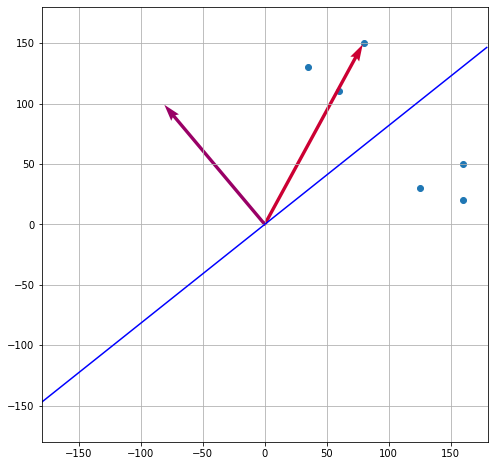

In [5]:
x = np.array([80, 60, 35, 160, 160, 125])
y = np.array([150, 110, 130, 50, 20, 30])

def nvec(v):
    # 法線ベクトル
    # 99 / -81 = -1.2222222222222223
    # 81 / 99
    return v * 0.8181818181818182

nx = np.arange(-180, 180, 1)
ny = nvec(nx)

# 正規化関数
def normalize(v):
    c = np.linalg.norm(v)
    return (v / c) * 80.0

# 計算の過程で出た重みベクトルのリスト
plotData = []
for v in log:
    plotData.append(v)

fig = plt.figure(figsize=(8.0, 8.0)) # グラフサイズ
plt.xlim(-180, 180)
plt.ylim(-180, 180)

# 学習データ
plt.scatter(x, y, marker = 'o')
# 縦長か横長かを判定する法線ベクトル
plt.plot(nx, ny, color='blue')

# 学習中に出たベクトルの変遷
# 赤を基調に、だんだん青が交じる
color = [1.0, 0.0, 0.0]
bias = 0.2
for v in plotData:
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color)
    color[0] = color[0] - bias
    color[2] = color[2] + bias


plt.grid()
plt.show()

これで無事青の法線ベクトルが引けた。  
当たり前だけど、学習サンプルが完全ではないので、この法線ベクトルでは縦長か横長かを完全に判定することはできない…が、それが縦長か横長かを学習する学習機はこんな感じでやれる。